In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import altair as alt
import pandas as pd

# plot parameters all coming from project.configurations
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

def collatz(n):
    if n == 1:                             
        result = [1]
    elif n % 2 == 0:
        result = collatz(n // 2) + [n]
    elif n % 2 == 1:
        result = collatz((3 * n) + 1) + [n]
    return result

In [19]:
runs=5000
zeros = np.zeros(5000)
seen = {}
sequence_lengths=[]
for i, anime in enumerate(tqdm(zeros)):
    length = collatz(i)
    plt.plot(length[::-1])
    sequence_lengths.append(len(length)) 

TypeError: 'module' object is not callable

In [15]:
def transforms(x):
    seq=[0]
    val=[0]
    rad=0
    even=-.54* (np.pi / 180 )
    odd = 1.2* (np.pi / 180 )
    for i in range(1, len(x)):
        if x[i]%2==0:
            seq.append(seq[i-1]+np.sin(rad+even))
            rad=rad+even            
        else:
            seq.append(seq[i-1]+np.sin(rad+odd))
            rad=rad+odd
        val.append(val[i-1]+np.cos(rad))
    return val,seq

<Figure size 720x720 with 0 Axes>

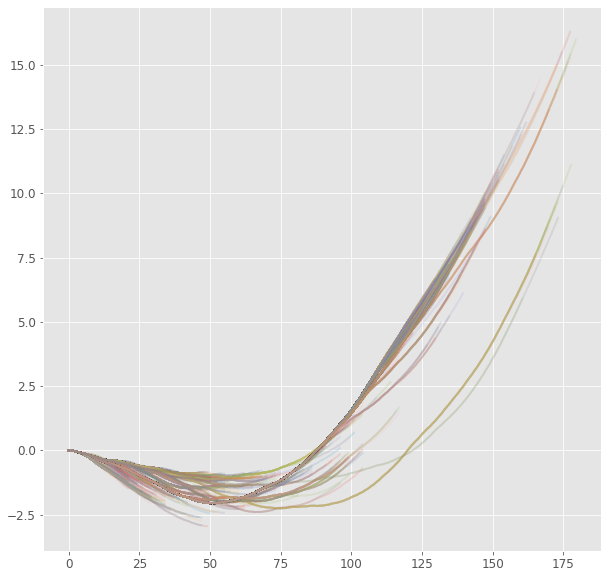

In [16]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
runs=2000
for i in range(1, runs):
    length = collatz(i)    
    sequence_lengths.append(length)
    x,y = transforms(np.array(length))
    #ax.set_facecolor('black')
    ax.plot(x,y, alpha=0.15); 

In [17]:
def collatz_escape(x, y, maxiter, escape=1000, cmap='magma'):    
    z = x + 1.0j * y.reshape(-1, 1)    
    image = np.zeros((len(x), len(y)), dtype='int')
    mask = np.full(image.shape, True)
    for i in range(maxiter):
        z[mask] = (2 + 7*abs(z[mask]) - (2 + 5*abs(z[mask]))*np.cos(np.pi*abs(z[mask])))/4;
        mask = abs(z) < escape
        image += mask
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(image, aspect='equal', cmap=cmap, origin='lower',
               extent=(x[0], x[-1], y[0], y[-1]))

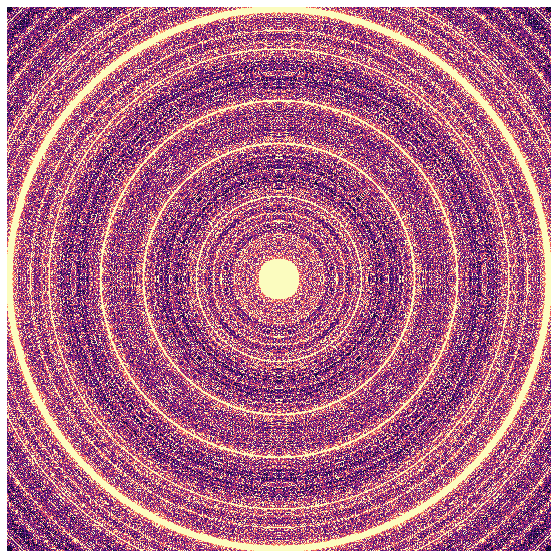

In [18]:
collatz_escape(x=np.linspace(-2,2,10000), y=np.linspace(-2,2,10000), maxiter=30)